<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Used-Python-Libraries" data-toc-modified-id="Used-Python-Libraries-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Used Python Libraries</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Example-Images" data-toc-modified-id="Example-Images-0.3.1"><span class="toc-item-num">0.3.1&nbsp;&nbsp;</span>Example Images</a></span></li></ul></li><li><span><a href="#Image-Preprocessing" data-toc-modified-id="Image-Preprocessing-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Image Preprocessing</a></span></li><li><span><a href="#Working-with-Image-Data" data-toc-modified-id="Working-with-Image-Data-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Working with Image Data</a></span><ul class="toc-item"><li><span><a href="#Preparing-Data" data-toc-modified-id="Preparing-Data-0.5.1"><span class="toc-item-num">0.5.1&nbsp;&nbsp;</span>Preparing Data</a></span><ul class="toc-item"><li><span><a href="#Feature-Reduction-with-PCA" data-toc-modified-id="Feature-Reduction-with-PCA-0.5.1.1"><span class="toc-item-num">0.5.1.1&nbsp;&nbsp;</span>Feature Reduction with PCA</a></span></li><li><span><a href="#PCA-Reconstruction-Examples" data-toc-modified-id="PCA-Reconstruction-Examples-0.5.1.2"><span class="toc-item-num">0.5.1.2&nbsp;&nbsp;</span>PCA Reconstruction Examples</a></span></li></ul></li></ul></li><li><span><a href="#XGBoost-Modeling---Bayesian-Hyperparameter-Optimization" data-toc-modified-id="XGBoost-Modeling---Bayesian-Hyperparameter-Optimization-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>XGBoost Modeling - Bayesian Hyperparameter Optimization</a></span></li><li><span><a href="#CNN" data-toc-modified-id="CNN-0.7"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>CNN</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation-with-Image-Preprocessing" data-toc-modified-id="Data-Preparation-with-Image-Preprocessing-0.7.1"><span class="toc-item-num">0.7.1&nbsp;&nbsp;</span>Data Preparation with Image Preprocessing</a></span></li><li><span><a href="#Model-Authoring" data-toc-modified-id="Model-Authoring-0.7.2"><span class="toc-item-num">0.7.2&nbsp;&nbsp;</span>Model Authoring</a></span></li><li><span><a href="#Data-Augmentation" data-toc-modified-id="Data-Augmentation-0.7.3"><span class="toc-item-num">0.7.3&nbsp;&nbsp;</span>Data Augmentation</a></span><ul class="toc-item"><li><span><a href="#Understanding-Data-Augmentation" data-toc-modified-id="Understanding-Data-Augmentation-0.7.3.1"><span class="toc-item-num">0.7.3.1&nbsp;&nbsp;</span>Understanding Data Augmentation</a></span></li></ul></li><li><span><a href="#Testing-the-Network" data-toc-modified-id="Testing-the-Network-0.7.4"><span class="toc-item-num">0.7.4&nbsp;&nbsp;</span>Testing the Network</a></span></li><li><span><a href="#Training-the-Model" data-toc-modified-id="Training-the-Model-0.7.5"><span class="toc-item-num">0.7.5&nbsp;&nbsp;</span>Training the Model</a></span></li><li><span><a href="#Extract-the-Activations-for-each-Layer" data-toc-modified-id="Extract-the-Activations-for-each-Layer-0.7.6"><span class="toc-item-num">0.7.6&nbsp;&nbsp;</span>Extract the Activations for each Layer</a></span></li></ul></li><li><span><a href="#Kaggle-Submission" data-toc-modified-id="Kaggle-Submission-0.8"><span class="toc-item-num">0.8&nbsp;&nbsp;</span>Kaggle Submission</a></span></li></ul></li><li><span><a href="#NOTES-HERE-BELOW---DO-NOT-RUN" data-toc-modified-id="NOTES-HERE-BELOW---DO-NOT-RUN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NOTES HERE BELOW - DO NOT RUN</a></span><ul class="toc-item"><li><span><a href="#Training-using-PCA..." data-toc-modified-id="Training-using-PCA...-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Training using PCA...</a></span></li><li><span><a href="#T-SNE---Visualize-to-see-what-hyperparams-work-better" data-toc-modified-id="T-SNE---Visualize-to-see-what-hyperparams-work-better-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>T-SNE - Visualize to see what hyperparams work better</a></span></li><li><span><a href="#T-SNE-Fit" data-toc-modified-id="T-SNE-Fit-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>T-SNE Fit</a></span></li></ul></li></ul></div>

## Objective

mmmm

[Back to Contents](#Table-of-Contents)

## Used Python Libraries

In [ ]:
# to make sure you use the latest version of kaggle:
!pip install --upgrade --force-reinstall --no-deps kaggle
# with an older version, not all files get downloaded

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Image loading and processing
import os
from PIL import Image
from PIL import Image, ImageDraw

from skimage.restoration import denoise_wavelet, estimate_sigma
from skimage import exposure
from skimage import data, img_as_float
import cv2

# Modelng
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, ShuffleSplit, StratifiedShuffleSplit
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# utils
from progressbar import Percentage, ProgressBar,Bar,ETA
import glob
import kaggle

# Hyperparameter optimization
from hyperopt import hp, space_eval, STATUS_OK
import hyperopt
from functools import partial


[Back to Contents](#Table-of-Contents)

## Load Data

A table in csv format is provided to identify the expert diagnosis label and the associated image label.

In [ ]:
!kaggle competitions download -c histopathologic-cancer-detection

In [ ]:
!mkdir data && unzip histopathologic-cancer-detection.zip -d data

In [ ]:
!rm histopathologic-cancer-detection.zip

In [2]:
training_labels_df = pd.read_csv('./data/train_labels.csv')
#training_labels_df = pd.read_csv('train_labels.csv')# in colab
print(training_labels_df.shape)
training_labels_df.sample(6)

(220025, 2)


id  label
19183   475108fad15be2afe93cd93ab6b58a114ae8191f      0
111366  bb71210880cb5fb796ad3245e4b8683435e0b880      0
211206  9c8a28fed7493e1e5e94013f188b9efd130a97fe      1
79273   527cf0a2944453e9e74dec45e20cb7e037ee7afc      0
218332  dbc8ec1525bc1406ca38ff5b68d6e06bef31c658      0
15635   1722153f2038ee6a105ded22e624ea8d5533465f      1

In [3]:
# Any duplicated exemplar?
any(training_labels_df.duplicated())

False

In [4]:
pd.DataFrame({'label': training_labels_df['label'].value_counts(), 
              'label (perc.)': 100*training_labels_df['label'].value_counts()/len(training_labels_df)})

label  label (perc.)
0  130908      59.496875
1   89117      40.503125

In [5]:
# image location
img_path ="./data/train"
# bounding box where identification neds to happen
ix1, iy1, ix2, iy2 = 47-16, 47-16, 47+16, 47+16

[Back to Contents](#Table-of-Contents)

### Example Images

In [6]:
def plot_rndm_images(label, img_path = "./data/train", rows_cols = (3,3), rnd_state=0):
    nrows, ncols=rows_cols[0], rows_cols[1]
    
    np.random.seed(rnd_state)
    imgs = np.random.choice(training_labels_df.loc[training_labels_df['label']==label]['id'].values, 
                            size=np.prod(rows_cols))
    fig,ax = plt.subplots(nrows,ncols,figsize=(10,10))
    fig.suptitle('Examples of Label=' + str(label) + ' Images', fontsize=25)
    plt.subplots_adjust(wspace=0, hspace=0) 
    for i,j in enumerate(imgs[:nrows*ncols]):
        fname = os.path.join(img_path ,j +'.tif')
        img = Image.open(fname)
        idcol = ImageDraw.Draw(img)
        idcol.rectangle(((0,0),(95,95)),outline='red') # each image has 96pxx96px
        idcol.rectangle(((ix1,iy1),(ix2,iy2)),outline='green')
        plt.subplot(nrows, ncols, i+1) 
        plt.imshow(np.array(img))
        plt.axis('off')  

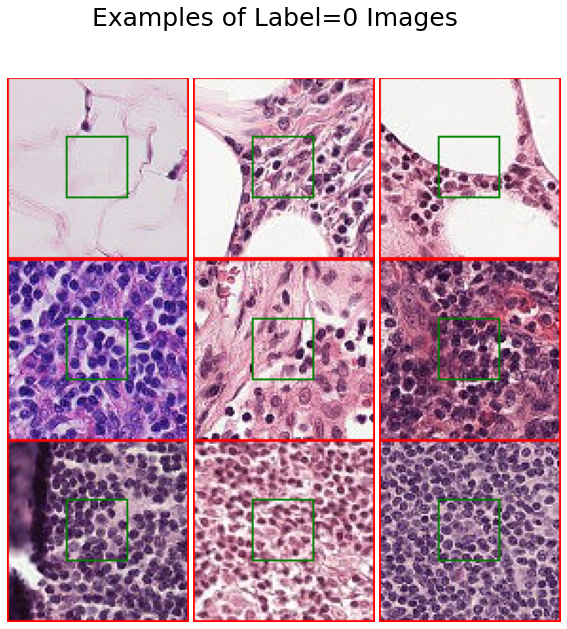

In [7]:
plot_rndm_images(0)

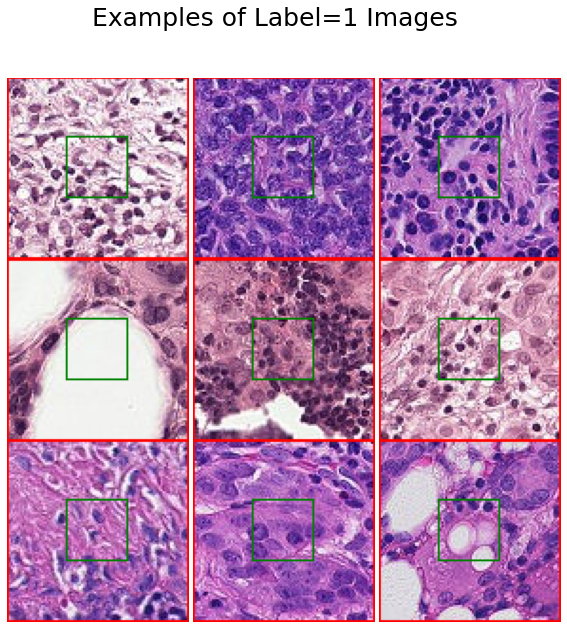

In [8]:
plot_rndm_images(1)

[Back to Contents](#Table-of-Contents)

## Image Preprocessing

1. Gaussian Filter for noise removal (https://scikit-image.org/docs/dev/auto_examples/filters/plot_denoise_wavelet.html)
2. Contrast enhancement (https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html). Thee equalized image has roughly linear cumulative distribution. As you can see there is a lot of noise in the above image, because it considers the global contrast of the image, not just the local contrast.
3. Different stains are used. To normalize images to the same stain, a stain normalizer should be applied.

Estimated Gaussian noise standard deviation = 8.901411819257346


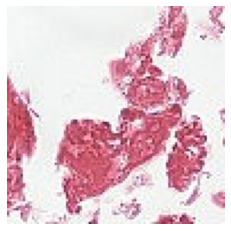

In [9]:
imgs_0 = np.array(Image.open(os.path.join(img_path,
                                 np.random.choice(training_labels_df.loc[training_labels_df['label']==0]['id'].values, size=1)[0]) +'.tif'))

plt.imshow(np.array(imgs_0))
plt.axis('off')  
        
# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(imgs_0, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")

(-0.5, 95.5, 95.5, -0.5)

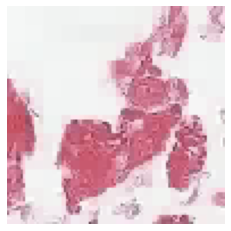

In [10]:
# VisuShrink is designed to eliminate noise with high probability, but this
# results in a visually over-smooth appearance.  
im_visushrink = denoise_wavelet(imgs_0, multichannel=True, convert2ycbcr=True,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est, rescale_sigma=True)
plt.imshow(np.array(im_visushrink))
plt.axis('off')  

(-0.5, 95.5, 95.5, -0.5)

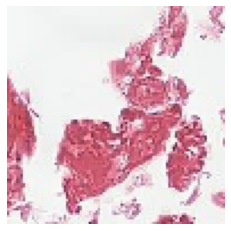

In [11]:
im_bayes = denoise_wavelet(imgs_0, multichannel=True, convert2ycbcr=True,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)

plt.imshow(np.array(im_bayes))
plt.axis('off')  

(-0.5, 95.5, 95.5, -0.5)

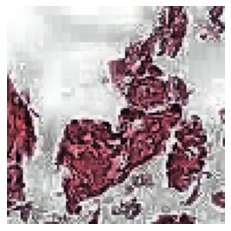

In [12]:
# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(im_bayes, clip_limit=0.03)

plt.imshow(np.array(img_adapteq))
plt.axis('off')  

CLAHE gives a much better result (see below) compared to the normal equalized image (above). However, we neeed to remove some inttroduced nois. We'll use thresholding.

(-0.5, 95.5, 95.5, -0.5)

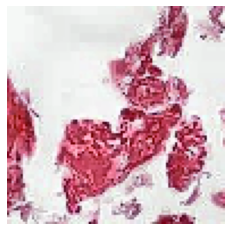

In [13]:
# CLAHE applies to gray scale images 
# Conversion of RGB to LAB(L for lightness and a and b for the color opponents green–red and blue–yellow) 
# will do the work. Apply CLAHE to the converted image in LAB format to only Lightness component and convert 
# back the image to RGB. 

norm_image = cv2.normalize(im_bayes, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
norm_image = norm_image.astype(np.uint8)

lab = cv2.cvtColor(norm_image, cv2.COLOR_BGR2LAB)
lab_planes = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2,tileGridSize=(4,4))
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes)
bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

plt.imshow(np.array(bgr))
plt.axis('off')  

(-0.5, 95.5, 95.5, -0.5)

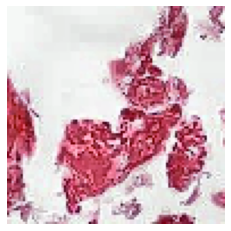

In [14]:
# remove noise using thresholding
lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
lab_planes = cv2.split(lab)
ret, thresh = cv2.threshold(lab_planes[0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lab = cv2.merge(lab_planes)
bgr_1 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

plt.imshow(np.array(bgr_1))
plt.axis('off')  

In [15]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

/Users/atambu/opt/anaconda3/lib/python3.8/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/Users/atambu/opt/anaconda3/lib/python3.8/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/Users/atambu/opt/anaconda3/lib/python3.8/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/Users/atambu/opt/anaconda3/lib/python3.8/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color

Text(0.5, 1.0, 'CLAHE+THRESH')

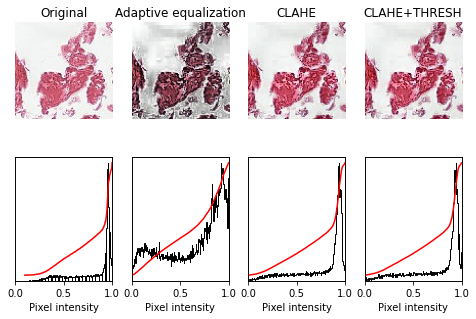

In [16]:
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2,4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(imgs_0, axes[:, 0])
ax_img.set_title('Original')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 1])
ax_img.set_title('Adaptive equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(bgr, axes[:, 2])
ax_img.set_title('CLAHE')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(bgr_1, axes[:, 3])
ax_img.set_title('CLAHE+THRESH')

In [17]:
def plot_rndm_images(label, proc = False, img_path = "./data/train", rows_cols = (3,3), rnd_state=0):
    nrows, ncols=rows_cols[0], rows_cols[1]
    
    np.random.seed(rnd_state)
    imgs = np.random.choice(training_labels_df.loc[training_labels_df['label']==label]['id'].values, 
                            size=np.prod(rows_cols))
    fig,ax = plt.subplots(nrows,ncols,figsize=(10,10))
    if proc:
        fig.suptitle('Examples of Label=' + str(label) + ' Preprocessed Images', fontsize=25)
    else:
        fig.suptitle('Examples of Label=' + str(label) + ' Images', fontsize=25)
        
    plt.subplots_adjust(wspace=0, hspace=0) 
    for i,j in enumerate(imgs[:nrows*ncols]):
        fname = os.path.join(img_path ,j +'.tif')
        img = Image.open(fname)
        
        if proc:
            # Estimate the average noise standard deviation across color channels and 
            # remove Gaussian noise
            sigma_est = estimate_sigma(np.array(img), multichannel=True, average_sigmas=True)
            img_proc = denoise_wavelet(np.array(img), multichannel=True, convert2ycbcr=True,
                               method='BayesShrink', mode='soft',
                               rescale_sigma=True)
            # Contrast enhancement - CLAHE - Gray scale image is needed
            ## normalize to 0-255
            img_proc = cv2.normalize(img_proc, None, alpha = 0, beta = 255, 
                                       norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
            img_proc = img_proc.astype(np.uint8)
            ## grey scale
            lab = cv2.cvtColor(img_proc, cv2.COLOR_BGR2LAB)
            lab_planes = cv2.split(lab)
            ## CLAHE
            clahe = cv2.createCLAHE(clipLimit=2,tileGridSize=(4,4))
            lab_planes[0] = clahe.apply(lab_planes[0])
            #lab = cv2.merge(lab_planes)
            #img_proc = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
            # Theshold based noise removal
            #lab = cv2.cvtColor(img_proc, cv2.COLOR_BGR2LAB)
            #lab_planes = cv2.split(lab)
            ret, thresh = cv2.threshold(lab_planes[0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            lab = cv2.merge(lab_planes)
            img_proc = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
            # convert to 0, 255 scale for plotting
            img_proc = cv2.normalize(img_proc, None, alpha = 0, beta = 255, 
                                       norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
            img_proc = img_proc.astype(np.uint8)
        
            img = Image.fromarray(img_proc)
            
        idcol = ImageDraw.Draw(img)
        idcol.rectangle(((0,0),(95,95)),outline='red') # each image has 96pxx96px
        idcol.rectangle(((ix1,iy1),(ix2,iy2)),outline='green')
        plt.subplot(nrows, ncols, i+1) 
        plt.imshow(np.array(img))
        plt.axis('off')  

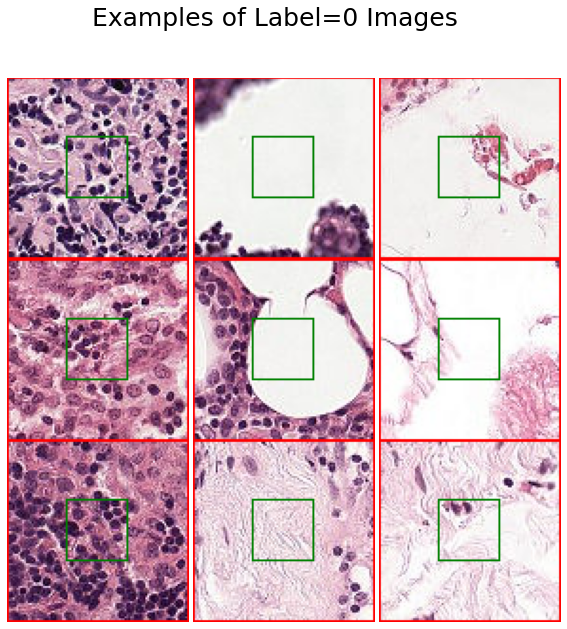

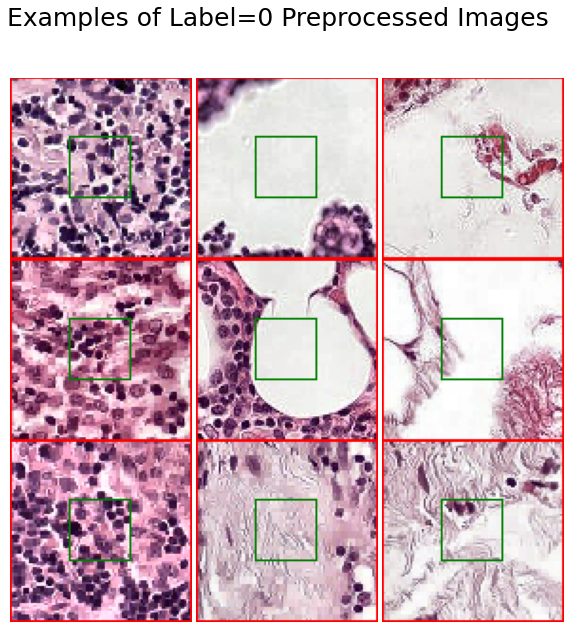

In [18]:
plot_rndm_images(0,False, rnd_state=2)
plot_rndm_images(0, True, rnd_state=2)

## Working with Image Data

In [19]:
print('An image can be converted to an array of size:', 
      np.array(Image.open(os.path.join(img_path ,training_labels_df.iloc[0]['id'] +'.tif'))).shape)


An image can be converted to an array of size: (96, 96, 3)


Let's take two random images, one with label=1 and the other with label=0. Can we separate them ...?

In [20]:
np.random.seed(1)

imgs_0 = np.array(Image.open(os.path.join(img_path ,
                                          np.random.choice(training_labels_df.loc[training_labels_df['label']==0]['id'].values, size=1)[0]) +'.tif'))

imgs_1 = np.array(Image.open(os.path.join(img_path ,
                                          np.random.choice(training_labels_df.loc[training_labels_df['label']==1]['id'].values, size=1)[0]) +'.tif'))


In [21]:
np.ravel(imgs_0[ix1:ix2,iy1:iy2,1]).shape, np.ravel(imgs_1[ix1:ix2,iy1:iy2,1]).shape

print('When we consider the central part of the image of size', ix2-ix1, 'px X', iy2-iy1, 'px',
     'the size of one exemplar becomes', np.ravel(imgs_0[ix1:ix2,iy1:iy2,1]).shape)

When we consider the central part of the image of size 32 px X 32 px the size of one exemplar becomes (1024,)


### Preparing Data

In [22]:
def preproc_img(img):
    
    # Estimate the average noise standard deviation across color channels and 
    # remove Gaussian noise
    sigma_est = estimate_sigma(img, multichannel=True, average_sigmas=True)
    img_proc = denoise_wavelet(img, multichannel=True, convert2ycbcr=True,
                               method='BayesShrink', mode='soft',
                               rescale_sigma=True)
    # Contrast enhancement - CLAHE - Gray scale image is needed
    ## 0-255 array
    img_proc = cv2.normalize(img_proc, None, alpha = 0, beta = 255, 
                             norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    img_proc = img_proc.astype(np.uint8)
    ## grey scale
    lab = cv2.cvtColor(img_proc, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2,tileGridSize=(4,4))
    lab_planes[0] = clahe.apply(lab_planes[0])
    # Theshold based noise removal - grey scale is needed
    ret, thresh = cv2.threshold(lab_planes[0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    ## back to color scale
    lab = cv2.merge(lab_planes)
    img_proc = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    # convert to 0, 255 scale 
    img_proc = cv2.normalize(img_proc, None, alpha = 0, beta = 255, 
                             norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    img_proc = img_proc.astype(np.uint8)
        
    return img

In [23]:
def getBatchData(img_path, img_names, verbose=False):
    imgs_np = []
    if verbose:
        pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
                           maxval=len(img_names)).start()
    k = 0
    for i,j in enumerate(img_names):
        fname = os.path.join(img_path ,j +'.tif')
        img = Image.open(fname)
        img_arr = np.array(img)
        img_arr = preproc_img(img_arr)
        imgs_np.append(np.ravel(img_arr[ix1:ix2,iy1:iy2,:])[:,None]/255.)
        k += 1
        if verbose:
            pbar.update(k)
    if verbose:
        pbar.finish()

    imgs_np = np.hstack(imgs_np).T
    
    return imgs_np

In [24]:
train_labels_df, test_labels_df = train_test_split(training_labels_df, test_size=0.25, 
                                                   stratify=training_labels_df.label, random_state=10)

train_labels_df.shape, test_labels_df.shape

((165018, 2), (55007, 2))

In [ ]:
%%time

img_names = test_labels_df['id'].values
X_test = getBatchData("./data/train", img_names, verbose=True)
y_test = test_labels_df['label'].values   

X_test.shape

In [ ]:
%%time

img_names = train_labels_df['id'].values
X_train = getBatchData("./data/train", img_names, verbose=True)
y_train = train_labels_df['label'].values

X_train.shape

#### Feature Reduction with PCA

We can use PCA to reduce the number of dimensions to a more reasonable amount of features

In [ ]:
pca_pipeline = make_pipeline(StandardScaler(), PCA(0.95, random_state=2)) 
components = pca_pipeline.fit_transform(X_train)
print('original shape:', X_train.shape)
print('after PCA (95%)', components.shape)

In [ ]:
plt.plot(np.cumsum(pca_pipeline['pca'].explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
components_test = pca_pipeline.transform(X_test)

#### PCA Reconstruction Examples

In [ ]:
weights = compute_class_weight('balanced', np.unique(y_train), y_train)

# assign same probability to the two labels
p_0 = weights[0]
p_1 = weights[1]
p_s = np.array([p_0 if i==0 else p_1 for i in y_train])
p_s = p_s/np.sum(p_s)

# random sample of images
n_imgs = 1000 # limit for visualization
np.random.seed(1)
lbls_i_s = np.random.choice(range(len(train_labels_df['id'].values)), 
                          p = p_s,
                          size=n_imgs)

print('labels (counts):', np.unique(y_train[lbls_i_s], return_counts=True)[1])

In [ ]:
comps = (0,1)

plt.scatter(components[lbls_i_s, comps[0]], components[lbls_i_s, comps[1]],
            c=y_train[lbls_i_s], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component '+str(comps[0]))
plt.ylabel('component '+str(comps[1]))
plt.colorbar();

In [ ]:
# Plot the PCA reconstruction
n_show = 5
projected = pca_pipeline.inverse_transform(components[lbls_i_s,:]) #reconstructed from components

fig, ax = plt.subplots(2, 5, figsize=(10, 10),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(n_show):

    ax[0, i].imshow((255*X_train[lbls_i_s,:][i,:]).astype('uint8').reshape(32,32,3), cmap='binary_r')
    ax[1, i].imshow((255*projected[i]).astype('uint8').reshape(32,32,3), cmap='binary_r')
    
ax[0, 0].set_ylabel('full dim\ninput')
ax[1, 0].set_ylabel('pca\nreconstruction');


[Back to Contents](#Table-of-Contents)

## XGBoost Modeling - Bayesian Hyperparameter Optimization


In [ ]:
def objective(space):
    
    print(space)
    
    # we use 10% of data to search the best parameters
    n_imgs = int(len(components)*0.1) 
    
    np.random.seed(1)
    lbls_i_s = np.random.choice(range(len(components)), 
                              p = p_s,
                              size=n_imgs)
    
    num_round = int(space['n_estimators'])
    dtrain = xgb.DMatrix(components[lbls_i_s,:], label=y_train[lbls_i_s])
    dvalid = xgb.DMatrix(components_test, label=y_test)
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm_model = xgb.train(space, dtrain, 
                          num_boost_round=num_round,
                          evals=watchlist,
                          early_stopping_rounds =10, 
                          verbose_eval=False)
    predictions = gbm_model.predict(dvalid,
                                    ntree_limit=gbm_model.best_iteration + 1)
    score = roc_auc_score(y_test, predictions)
    print("\tScore {0}\n\n".format(score))
    # Hyperopt minimizes...
    loss = 1 - score
    return {'loss': loss, 'status': STATUS_OK}


space = {
    'n_estimators': hp.choice('n_estimators', [1000]),#hp.quniform('n_estimators', 100, 1000, 1)
    'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
    'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
    'learning_rate':  hp.choice('learning_rate', [0.001, 0.01, 0.1, 1]),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
    'reg_lambda': hp.choice('reg_lambda', [0,1,10,100,1000]),#l2
    'gamma': hp.choice('gamma', [0,1,10,100,1000]), #l1
    'eval_metric': 'auc',
    'objective': 'binary:logistic',
    # Increase this number if you have more cores. Otherwise, remove it and it will default 
    # to the maxium number. 
    'nthread': 4,
    'booster': 'gbtree',
    'tree_method': 'exact',
    'silent': 1,
    'seed': 0,
    
}


# Object stores all information about each trial.
# Also, it stores information about the best trial.
trials = hyperopt.Trials()

tpe = partial(
    hyperopt.tpe.suggest,

    # Sample 1000 candidate and select candidate that
    # has highest Expected Improvement
    n_EI_candidates=1000,

    # Use 20% of best observations to estimate next
    # set of parameters
    gamma=0.2,

    # First 20 trials are going to be random
    n_startup_jobs=20
)

best_trial = hyperopt.fmin(
    objective,

    trials=trials,
    space=space,

    # Set up TPE for hyperparameter optimization
    algo=tpe,

    # Maximum number of iterations. Basically it trains at
    # most 200 networks before selecting the best one.
    max_evals=100
)

In [ ]:
param_dist = space_eval(space, best_trial)
param_dist

In [ ]:
import pprint

pp = pprint.PrettyPrinter(indent=4)

trials_results = {}
trials_vals = {}
trials_nodes = {}
for i in range(len(trials.trials)):
    trials_results[i] = trials.trials[i]['result']['loss']
    trials_vals[i] = trials.trials[i]['misc']['vals']
    pp.pprint(trials.trials[i]["result"])

In [ ]:
dtrain = xgb.DMatrix(components, label=y_train)
dvalid = xgb.DMatrix(components_test, label=y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm_model = xgb.train(param_dist, 
                      dtrain, 
                      num_boost_round = int(param_dist['n_estimators']),
                      evals=watchlist,
                      early_stopping_rounds =10, 
                      verbose_eval=True)

In [ ]:
predictions = gbm_model.predict(dvalid,
                                ntree_limit=gbm_model.best_iteration + 1)
score = roc_auc_score(y_test, predictions)
print("\tScore {0}\n\n".format(score))

In [ ]:
import pickle

# save the model to disk
filename = 'gbm_model.sav'
pickle.dump(gbm_model, open(filename, 'wb'))
 

In [ ]:
# load the model from disk
filename = 'gbm_model.sav'
gbm_model = pickle.load(open(filename, 'rb'))

## CNN

According to this [paper](https://papers.nips.cc/paper/2019/file/eb1e78328c46506b46a4ac4a1e378b91-Paper.pdf):
"transfer learning offers limited performance gains and much smaller architectures can perform
comparably to the standard IMAGENET models". However, substantial gain in terms of speeding the computation arises when "Use the pretrained weights only from the lowest two layers. The rest of the network is randomly initialized and fine-tuned for the medical imaging task." (see [here](https://theaisummer.com/medical-imaging-transfer-learning/) for example)

In [ ]:
#!pip install -U efficientnet
# https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

In [25]:
from keras.applications import vgg16 
import efficientnet.keras as efn

#from keras.applications.vgg16 import decode_predictions
#from keras.preprocessing.image import load_img, img_to_array
#from keras.applications.imagenet_utils import preprocess_input
#from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.backend import clear_session

from keras.optimizers import Adam

from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from keras import Model, Sequential

from keras.models import load_model, save_model 

from keras.preprocessing.image import ImageDataGenerator


### Data Preparation with Image Preprocessing

In [26]:
def pull_images(img_path, img_names, crop_and_scale=False, verbose=True):
    imgs = []
    if verbose:
        pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
                           maxval=len(img_names)).start()
    k = 0
    for i,j in enumerate(img_names):
        fname = os.path.join(img_path ,j +'.tif')
        img = np.asarray(Image.open(fname), dtype=np.float32) # for drawing
        img = preproc_img(img) 
        if crop_and_scale:
            imgs.append(img[None,ix1:ix2,iy1:iy2,:]/255)
        else:
            imgs.append(img[None,:,:,:])
        k += 1
        if verbose:
            pbar.update(k)
    if verbose:
        pbar.finish()

    imgs_np = np.concatenate(imgs, axis=0)
    
    return imgs_np

In [27]:
#NOTES:
#Image.fromarray(X_train[0], 'RGB') #must be np.int8 to draw and not normalized if you want to check cropping
#plt.imshow(np.array(Image.open(os.path.join(img_path ,img_names[0] +'.tif'))))

In [28]:
# for training data we preprocess, but cropping and scaling will be done in the image generation after augmentation
img_names = train_labels_df['id'].values
X_train = pull_images("./data/train", img_names, crop_and_scale=False, verbose=True)
X_train.shape

/Users/atambu/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/atambu/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
[==========================================================] 100% Time: 0:28:30


(165018, 96, 96, 3)

In [29]:
# for test data,  we preprocess, crop and scale (no augmentation will be used)
img_names = test_labels_df['id'].values
X_test = pull_images("./data/train", img_names, crop_and_scale=True, verbose=True)
X_test.shape

[==========================================================] 100% Time: 0:10:18


(55007, 32, 32, 3)

In [30]:
y_train = train_labels_df['label'].values   
y_test = test_labels_df['label'].values   

### Model Authoring

[EfficientNet fine tuning](https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/)

In [31]:
# original model
base_model = efn.EfficientNetB0(weights='imagenet', #using pre-trained weights
                       )
base_model.summary()

21831680/21826536 [==============================] - 1s 0us/step: 
Model: "efficientnet-b0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 32) 0           stem_bn[0][0]                    
_________________

The EFN model was trained to classify 1000 different images. We remove the classification/softmax layer containing 1000 units. Also, the input needs to accept our input format. 

In [32]:
clear_session()
base_model = efn.EfficientNetB0(weights='imagenet', #using pre-trained weights
                        input_shape=(32, 32, 3),
                        include_top=False # rm thee last fully connected layer
                       )

# make layers non-trainable except...
for layer in base_model.layers:
    layer.trainable = False

# the top layers, which we rebuild here
x = GlobalAveragePooling2D(name="avg_pool")(base_model.output)
x = BatchNormalization()(x)

top_dropout_rate = 0.2
x = Dropout(top_dropout_rate, name="top_dropout")(x)
# adding more layers helps
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
out = Dense(1, activation="sigmoid", name="pred")(x) 

custom_base_model = Model(base_model.input, out)

# print the layers of the CNN
custom_base_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 16, 16, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 16, 16, 32)   128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 16, 16, 32)   0           stem_bn[0][0]                    
______________________________________________________________________________________________

### Data Augmentation

The network has 4M+ parameters, so we need to augment the data using a generator.

In [33]:
# Create a Data Generator
data_gen_args = dict( 
    rotation_range=30.,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.2,
    channel_shift_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    data_format="channels_last",
)
image_datagen = ImageDataGenerator(**data_gen_args)

In [34]:
# create a custom generator that adds image preproc and cropping
def custom_generator(batches, crop_length=32, ix1=ix1, ix2=ix2, iy1=iy1, iy2=iy2):
    """Take as input a Keras ImageGen (Iterator) and generate a
    cropped version from the image batches generated by the original iterator.
    """
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = batch_x[i][None,ix1:ix2,iy1:iy2,:]/255.

        yield (batch_crops, batch_y)

#### Understanding Data Augmentation

Epoch 0
(6, 32, 32, 3)


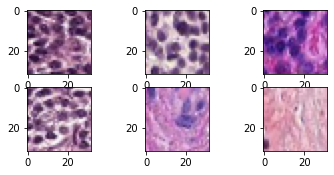

[0 0 0 0 1 0]
Epoch 1
(6, 32, 32, 3)


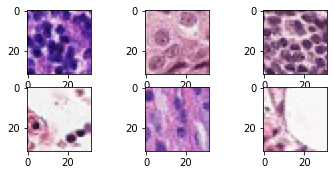

[0 1 0 0 1 0]
Epoch 2
(6, 32, 32, 3)


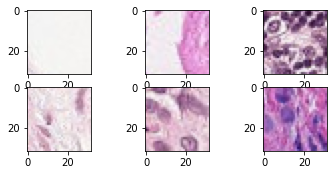

[0 0 0 0 1 1]
Epoch 3
(6, 32, 32, 3)


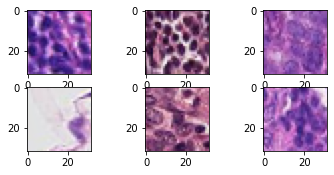

[0 0 1 0 1 0]
Epoch 4
(6, 32, 32, 3)


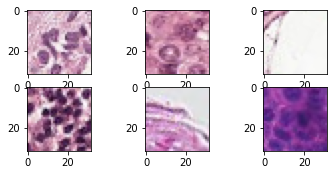

[1 1 1 0 0 1]


In [35]:
aug_batch_size = 6
batch_datagen = image_datagen.flow(X_train, y_train, batch_size=aug_batch_size)
batch_datagen = custom_generator(batch_datagen, 32)

for e in range(5):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in batch_datagen:
        print(x_batch.shape)
        for i in range(0, aug_batch_size):
            plt.subplot(330+1 + i)
            plt.imshow(x_batch[i], cmap=plt.get_cmap('gray'))
        

        plt.show()
        print(y_batch)
        break

### Testing the Network

In [ ]:
# for testing purposes, sample fewer images
i_s, _ = train_test_split(np.arange(0,len(y_train)), train_size=1000,
                          stratify=y_train, random_state=10)

i_s1, _ = train_test_split(np.arange(0,len(y_test)), train_size=1000,
                          stratify=y_test, random_state=20)

print(np.unique(y_train[i_s], return_counts=True), np.unique(y_test[i_s1], return_counts=True))

custom_base_model.compile(loss="binary_crossentropy", optimizer=Adam(), 
                         metrics=["accuracy"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, 
                   restore_best_weights=True, 
                   patience=10)
                
n_epochs = 50
batch_size = 512
custom_base_model_history = custom_base_model.fit(image_datagen.flow(X_train[i_s], 
                                                                     y_train[i_s], 
                                                                     batch_size=batch_size),
                                                  steps_per_epoch=len(X_train[i_s]) / batch_size, 
                                                  validation_data=(X_test[i_s1], y_test[i_s1]),
                                                  epochs=n_epochs, callbacks=[es])

#custom_base_model_history = custom_base_model.fit(X_train[i_s], 
#                                                y_train[i_s],
#                                                validation_data=(X_test[i_s1], y_test[i_s1]),
#                                                batch_size = batch_size,
#                                                epochs=n_epochs, callbacks=[es])

### Training the Model

1. Train with all layers frozen except the classification (top) layers.
2. Unfreeze a block of layers at the time and reduce learning rate

During fine tuning (from keras notes):
1. The BathcNormalization layers need to be kept frozen (more details). If they are also turned to trainable, the first epoch after unfreezing will significantly reduce accuracy.
2. In some cases it may be beneficial to open up only a portion of layers instead of unfreezing all. This will make fine tuning much faster when going to larger models like B7.
3. Each block needs to be all turned on or off. This is because the architecture includes a shortcut from the first layer to the last layer for each block. Not respecting blocks also significantly harms the final performance.

In [36]:
batch_size = 128 # number of images generated for a batch
steps_per_epoch = int(len(X_train) / batch_size)
n_epochs = 10

Train the classification layer first; stop training with early stopping. Validation error is expected to be lower since we're training on augmented images but validating on actual images.

In [37]:
custom_base_model.compile(loss="binary_crossentropy", optimizer=Adam(1e-4), 
                         metrics=["accuracy"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, 
                   restore_best_weights=True, 
                   patience=5)
                
batch_datagen = image_datagen.flow(X_train, y_train, batch_size=batch_size)
batch_datagen = custom_generator(batch_datagen, 32)

custom_base_model_history = custom_base_model.fit(batch_datagen,
                                                  steps_per_epoch=steps_per_epoch, 
                                                  epochs=n_epochs, 
                                                  validation_data=(X_test, y_test), 
                                                  callbacks=[es])


Epoch 1/10
1289/1289 [==============================] - 664s 512ms/step - loss: 0.5741 - accuracy: 0.7265 - val_loss: 0.4885 - val_accuracy: 0.7785
Epoch 2/10
1289/1289 [==============================] - 689s 535ms/step - loss: 0.4964 - accuracy: 0.7674 - val_loss: 0.4811 - val_accuracy: 0.7839
Epoch 3/10
1289/1289 [==============================] - 652s 506ms/step - loss: 0.4851 - accuracy: 0.7724 - val_loss: 0.4818 - val_accuracy: 0.7849
Epoch 4/10
1289/1289 [==============================] - 699s 543ms/step - loss: 0.4828 - accuracy: 0.7750 - val_loss: 0.4706 - val_accuracy: 0.7864
Epoch 5/10
1289/1289 [==============================] - 697s 541ms/step - loss: 0.4758 - accuracy: 0.7778 - val_loss: 0.4682 - val_accuracy: 0.7878
Epoch 6/10
1289/1289 [==============================] - 700s 543ms/step - loss: 0.4733 - accuracy: 0.7806 - val_loss: 0.4675 - val_accuracy: 0.7877
Epoch 7/10
1289/1289 [==============================] - 697s 541ms/step - loss: 0.4730 - accuracy: 0.7796 - val_

In [38]:
preds = custom_base_model.predict(X_test, use_multiprocessing=True, verbose=1)

1719/1719 [==============================] - 72s 40ms/step


In [39]:
from sklearn.metrics import accuracy_score
preds = ((preds > 0.5)+0).ravel() 
acc = accuracy_score(y_test, preds)
acc

0.790790263057429

In [40]:
custom_base_model_history_1 = []
custom_base_model_history_1.append(custom_base_model_history)

We unfreeze block by block while leaving BatchNorm layers frozen. We train for 50 epochs each but use patience=5 for ES. Also, the learning rate is one order of magnitude smaller.

A side note on freezing/unfreezing models: setting trainable of a Model will simultaneously set all layers belonging to the Model to the same trainable attribute. Each layer is trainable only if both the layer itself and the model containing it are trainable. Hence when we need to partially freeze/unfreeze a model, we need to make sure the trainable attribute of the model is set to True.




In [ ]:
# unfreeze one block at a time, train, and finally freeze that block again
custom_base_model_best = custom_base_model

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, 
                   restore_best_weights=True, 
                   patience=5)

acc_best = acc
for ln in ['block'+str(i) for i in range(1,8)]:
    print('Unfreezing', ln)
    for layer in custom_base_model.layers:
        if not isinstance(layer, BatchNormalization) and ln in layer.name:
            layer.trainable = True

    # this sets the model trainable attribute to True
    custom_base_model.compile(loss="binary_crossentropy", 
                              optimizer=Adam(1e-4), 
                              metrics=["accuracy"])

    custom_base_model_history_tmp = custom_base_model.fit(batch_datagen,
                                                      steps_per_epoch=steps_per_epoch, 
                                                      epochs=n_epochs, 
                                                      validation_data=(X_test, y_test), 
                                                      callbacks=[es])
        
    custom_base_model_history_1.append(custom_base_model_history_tmp)
    
    preds = custom_base_model.predict(X_test, use_multiprocessing=True, verbose=1) 
    preds = ((preds > 0.5)+0).ravel() 
    acc = accuracy_score(y_test, preds)
    
    # if we didn't improve accuracy by training these layers,
    # go back to previous model and start again
    if acc > acc_best:
        acc_best = acc
        custom_base_model_best = custom_base_model
    else:
        custom_base_model = custom_base_model_best
    
    # Freeze back
    for layer in custom_base_model.layers:
        if not isinstance(layer, BatchNormalization) and ln in layer.name:
            layer.trainable = False


Unfreezing block1
Epoch 1/10
1289/1289 [==============================] - 951s 731ms/step - loss: 0.4687 - accuracy: 0.7820 - val_loss: 0.4549 - val_accuracy: 0.7926
Epoch 2/10
1289/1289 [==============================] - 847s 657ms/step - loss: 0.4651 - accuracy: 0.7848 - val_loss: 0.4504 - val_accuracy: 0.7943
Epoch 3/10
1289/1289 [==============================] - 797s 619ms/step - loss: 0.4601 - accuracy: 0.7875 - val_loss: 0.4531 - val_accuracy: 0.7916
Epoch 4/10
1289/1289 [==============================] - 939s 729ms/step - loss: 0.4568 - accuracy: 0.7905 - val_loss: 0.4514 - val_accuracy: 0.7954
Epoch 5/10
1289/1289 [==============================] - 911s 707ms/step - loss: 0.4556 - accuracy: 0.7901 - val_loss: 0.4483 - val_accuracy: 0.7936
Epoch 6/10
1289/1289 [==============================] - 880s 683ms/step - loss: 0.4548 - accuracy: 0.7909 - val_loss: 0.4439 - val_accuracy: 0.7967
Epoch 7/10
1289/1289 [==============================] - 876s 680ms/step - loss: 0.4509 - accur

In [ ]:
training_loss = [j for i in custom_base_model_history_1 for j in i.history['loss']]
val_loss = [j for i in custom_base_model_history_1 for j in i.history['val_loss']]
training_acc = [j for i in custom_base_model_history_1 for j in i.history['accuracy']]
val_acc = [j for i in custom_base_model_history_1 for j in i.history['val_accuracy']]

In [ ]:
plt.plot(training_loss)
plt.plot(val_loss)
plt.title('Model Loss')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
plt.plot(training_acc)
plt.plot(val_acc)
plt.title('Model Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Use best
custom_base_model = custom_base_model_best

### Extract the Activations for each Layer

Source https://www.kaggle.com/amarjeet007/visualize-cnn-with-keras

In [ ]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [ ]:
# Extract the output of each layer in the model
layer_outputs = [l.output for l in custom_base_model.layers]
# Define a new model with the same input shape as the original model 
# and layer_outputs as its outputs
activation_model = Model(custom_base_model.input, layer_outputs) 
# Get all the activations by calling the predict() method on the number 10 image 
# in X_train. Make sure to reshape the image so it has a new 0 axis of length 1.
activations = activation_model.predict(X_test[0][None,])

In [ ]:
# original image
plt.imshow(X_test[0])

In [ ]:
layer_outputs[3]

In [ ]:
# layer 1 is input layer, display activations after layer 2
display_activation(activations, 4, 4, 3)


In [ ]:
layer_outputs[13] # at exit from block1

In [ ]:
display_activation(activations, 4, 4, 13)


In [ ]:
layer_outputs[41] #at exit of block 2

In [ ]:
display_activation(activations, 4, 4, 41)


## Kaggle Submission

https://www.kaggle.com/c/histopathologic-cancer-detection/leaderboard

In [ ]:
subm_imgs = [i.replace('./data/test/','').replace('.tif','') for i in glob.glob("./data/test/*.tif")]
subm_imgs[:10]

In [ ]:
### GBM

In [ ]:
subm_imgs_np = getBatchData('./data/test/', subm_imgs, True)

subm_imgs_np.shape

In [ ]:
components_subm = pca_pipeline.transform(subm_imgs_np)

In [ ]:
dsubm = xgb.DMatrix(components_subm, label=None)

subm_preds = gbm_model.predict(dsubm,
                               ntree_limit=gbm_model.best_iteration + 1) #0.8766 on Leaderboard

In [ ]:
pd.DataFrame({'id': subm_imgs, 'label': subm_preds}).to_csv('./data/submission_gbm.csv', index=False)

In [ ]:
### NN

In [ ]:
subm_imgs_np = pull_images("./data/test/", subm_imgs, crop_and_scale=True, verbose=True)

subm_imgs_np.shape

In [ ]:
subm_preds = custom_base_model.predict(subm_imgs_np, use_multiprocessing=True, verbose=1) # on Leaderboard 0.6840
subm_preds = ((subm_preds > 0.5)+0).ravel() 


In [ ]:
pd.DataFrame({'id': subm_imgs, 
              'label': subm_preds.reshape(-1)}).to_csv('./data/submission_efn.csv', index=False)

# NOTES HERE BELOW - DO NOT RUN

## Training using PCA... 

In [ ]:
clear_session()

custom_base_model = Sequential()
custom_base_model.add(Dense(300, activation='relu', activity_regularizer=regularizers.l2(1e-3)))
custom_base_model.add(Dense(150, activation='relu', activity_regularizer=regularizers.l2(1e-3)))
custom_base_model.add(Dense(75, activation='relu', activity_regularizer=regularizers.l2(1e-3)))
custom_base_model.add(Dense(30, activation='relu'))
custom_base_model.add(Dense(2, activation='softmax'))

keras_pipeline = make_pipeline(StandardScaler())
keras_X_train = keras_pipeline.fit_transform(components)
keras_X_test = keras_pipeline.transform(components_test)


custom_vgg_model.compile(loss="categorical_crossentropy", optimizer=Adam(), 
                         metrics=["AUC"])


es = EarlyStopping(monitor='val_loss', verbose=0, 
                   restore_best_weights=True, 
                   patience=10)
                
batch_size = 100
n_epochs = 50
# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random
custom_base_model_history = custom_base_model.fit(keras_X_train, 
                                                to_categorical(y_train),
                                                validation_data=(keras_X_test, to_categorical(y_test)),
                                                batch_size = batch_size,
                                                epochs=n_epochs, callbacks=[es])


In [ ]:
plt.plot(custom_base_model_history.history['loss'])
plt.plot(custom_base_model_history.history['val_loss'])
plt.title('Model accuracy')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## T-SNE - Visualize to see what hyperparams work better

In [ ]:
import tensorflow as tf
from tensorboard.plugins import projector

## Get working directory
PATH = os.getcwd()
## Path to save the embedding and checkpoints generated
LOG_DIR = PATH + '/project-tensorboard/'
os.mkdir(LOG_DIR)
LOG_DIR = PATH + '/project-tensorboard/log-1'
os.mkdir(LOG_DIR)

In [ ]:
def register_embedding(embedding_tensor_name, meta_data_fname, log_dir):
    config = projector.ProjectorConfig()
    embedding = config.embeddings.add()
    embedding.tensor_name = embedding_tensor_name
    embedding.metadata_path = meta_data_fname
    projector.visualize_embeddings(log_dir, config)

def save_labels_tsv(labels, filepath, log_dir):
    with open(os.path.join(log_dir, filepath), 'w') as f:
        for label in labels:
            f.write('{}\n'.format(label))

In [ ]:
META_DATA_FNAME = 'labels.tsv'  # Labels will be stored here
EMBEDDINGS_TENSOR_NAME = 'labels'
EMBEDDINGS_FPATH = os.path.join(LOG_DIR, EMBEDDINGS_TENSOR_NAME + '.ckpt')
STEP = 0

register_embedding(EMBEDDINGS_TENSOR_NAME, META_DATA_FNAME, LOG_DIR)
save_labels_tsv(y_train[:10000], META_DATA_FNAME, LOG_DIR)

In [ ]:
tf.compat.v1.disable_eager_execution()
tensor_embeddings = tf.Variable(components[:10000], name=EMBEDDINGS_TENSOR_NAME)
sess = tf.compat.v1.InteractiveSession()
sess.run(tf.compat.v1.global_variables_initializer())
saver = tf.compat.v1.train.Saver()
saver.save(sess, EMBEDDINGS_FPATH, STEP)
sess.close()

In [ ]:
np.unique(y_train[:10000], return_counts=True)

In [ ]:
!kill 49657

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir project-tensorboard/log-1

## T-SNE Fit

In [ ]:
from sklearn.manifold import TSNE

fashion_tsne = TSNE(random_state=1).fit_transform(X_train)


In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, 
                               class_weight='balanced', random_state=42, n_jobs=-1)  
model.fit(X_train, y_train)


In [ ]:
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    auc   = roc_auc_score(y_test, y_pred)
    acc   = accuracy(y_test, y_pred)
    rec   = recall(y_test, y_pred)
    prec  = precision(y_test, y_pred)
    f1    = f1_score(y_test, y_pred)
    
    print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}, AUC = {auc}')
    print('Confusion Matrix is:')
    print(cm)


In [ ]:
pca_pipeline = make_pipeline(StandardScaler(), PCA(0.95, random_state=2)) 
components = pca_pipeline.fit_transform(X_train)
projected = pca_pipeline.inverse_transform(components)
print('original shape:', X_train.shape)
print('after PCA (95%)', components.shape)

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, 
                               class_weight='balanced', random_state=42, n_jobs=-1)  
model.fit(components, y_train)


In [ ]:
    y_pred = model.predict(pca_pipeline.transform(X_test))
    
    cm = confusion_matrix(y_test, y_pred)
    auc   = roc_auc_score(y_test, y_pred)
    acc   = accuracy(y_test, y_pred)
    rec   = recall(y_test, y_pred)
    prec  = precision(y_test, y_pred)
    f1    = f1_score(y_test, y_pred)
    
    print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}, AUC = {auc}')
    print('Confusion Matrix is:')
    print(cm)


In [ ]:
# create random batches from **training data**
n_splits = 100
max_batch_size = 1000

# assign same probability to be picked 
weights = compute_class_weight('balanced', np.unique(train_labels_df.label), train_labels_df.label)
p_0 = weights[0]
p_1 = weights[1]
p_s = np.array([p_0 if i==0 else p_1 for i in train_labels_df['label']])
p_s = p_s/np.sum(p_s)

print('Generating', n_splits, 'balanced random batches of size', max_batch_size)

[Back to Contents](#Table-of-Contents)